In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv
/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv
/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv


https://www.interviewqs.com/blog/case-study-example-1
https://github.com/erood/interviewqs.com_code_snippets/blob/master/Case_1/interviewqs_case_1.ipynb


case study example

In [2]:
customer_df=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')
seller_df=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv')
order_review=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv')
order_item=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
product_df=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')
geo_df=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv')
cat_translated=pd.read_csv('/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv')
order_df=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
payment_df=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv')

In [3]:
cust_order_df=order_df.merge(customer_df, how='left', on='customer_id')
cust_order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


# EDA

99441
99441
96096
order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
dtype: int64


Text(0, 0.5, 'No. of Customers')

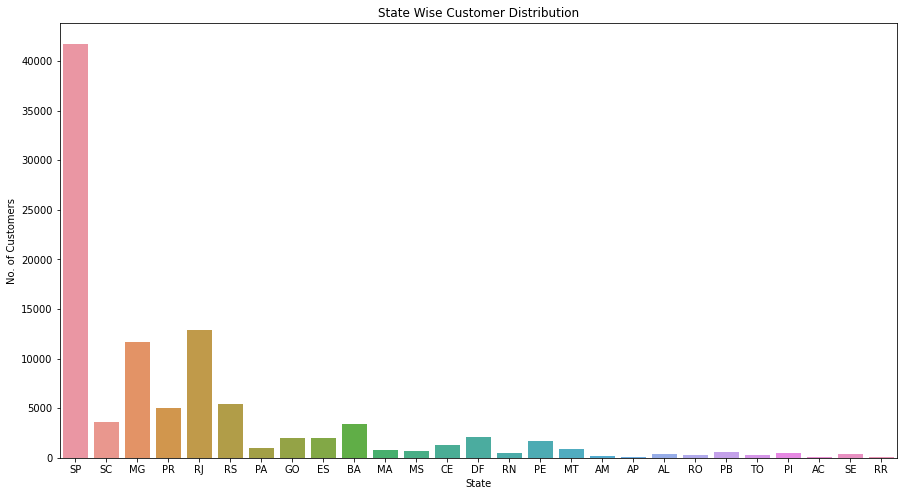

In [4]:
print(order_df['order_id'].nunique())
print(len(order_df['customer_id'].unique()))
print(customer_df['customer_unique_id'].nunique())

print(order_df.groupby(['order_status']).size())

# plotting state wise customer distribution
plt.figure(figsize=(15,8))
sns.countplot(x='customer_state', data=customer_df)
plt.title('State Wise Customer Distribution')
plt.xlabel('State')
plt.ylabel('No. of Customers')

In [5]:
# checking for missing values
geo_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [6]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(geo_df['geolocation_lng'], geo_df['geolocation_lat'])]
gdf = GeoDataFrame(geo_df, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


<AxesSubplot:>

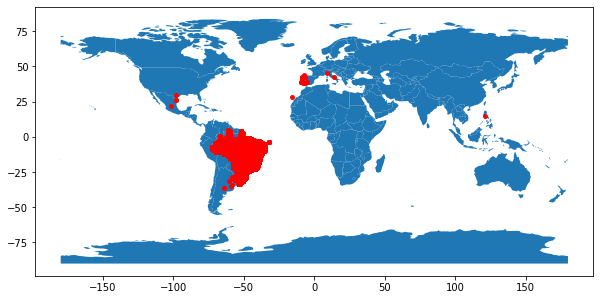

In [7]:
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)
# world.plot(figsize=(10, 6))

In [8]:
#payment type
payment_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [9]:
payment_df.groupby(['payment_type']).size()

payment_type
boleto         19784
credit_card    76795
debit_card      1529
not_defined        3
voucher         5775
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'no. customer')

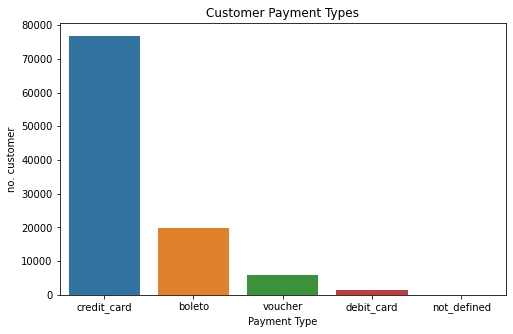

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(payment_df['payment_type'])
plt.title('Customer Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('no. customer')

  payment_type  payment_value
0       boleto     145.034435
1  credit_card     163.319021
2   debit_card     142.570170
3  not_defined       0.000000
4      voucher      65.703354


Text(0, 0.5, 'Amount Spent')

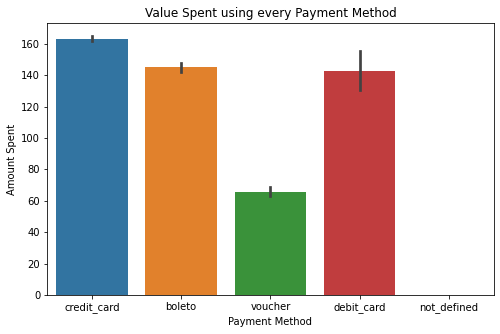

In [11]:
payment_type_spend = payment_df.groupby('payment_type')['payment_value'].mean().reset_index()
print(payment_type_spend)
# average value in barplot
plt.figure(figsize=(8,5))
sns.barplot(x='payment_type', y='payment_value', data=payment_df)
plt.title('Value Spent using every Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Amount Spent')


  payment_type  payment_value
0       boleto     2869361.27
1  credit_card    12542084.19
2   debit_card      217989.79
3  not_defined           0.00
4      voucher      379436.87


Text(0, 0.5, 'Amount Spent')

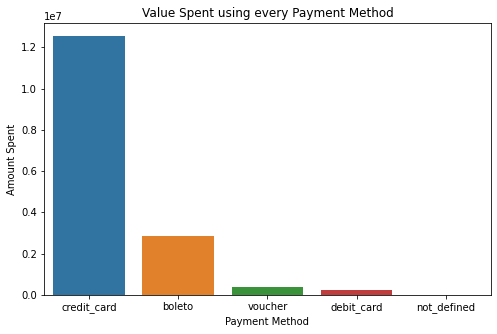

In [12]:
payment_type_spend = payment_df.groupby('payment_type')['payment_value'].sum().reset_index()
print(payment_type_spend)
# total value in barplot
plt.figure(figsize=(8,5))
sns.barplot(x='payment_type', y='payment_value', data=payment_type_spend,\
           order=['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'])
plt.title('Value Spent using every Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Amount Spent')

98673
98410
99224


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'no. reviews')

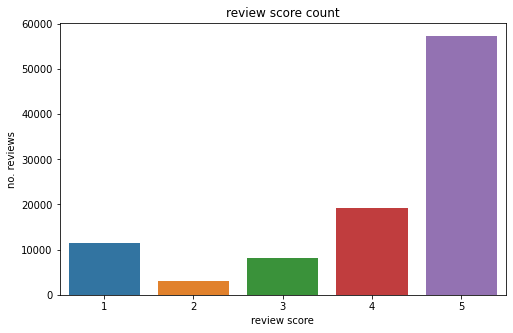

In [13]:
print(order_review['order_id'].nunique())
print(order_review['review_id'].nunique())
print(len(order_review))
plt.figure(figsize=(8,5))
sns.countplot(order_review['review_score'])
plt.title('review score count')
plt.xlabel('review score')
plt.ylabel('no. reviews')

Text(0, 0.5, 'no. products sold')

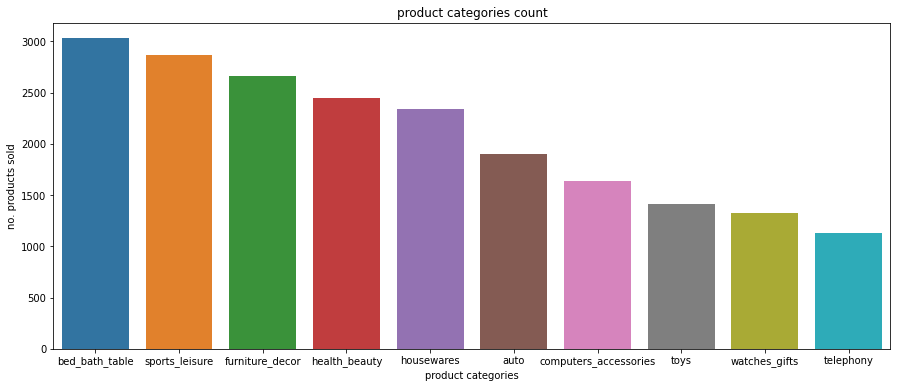

In [14]:
product_df_eng = product_df.merge(cat_translated, how='left', on='product_category_name')
product_sub=product_df_eng.groupby('product_category_name_english').size()
product_sub=product_sub.to_frame('count').reset_index()
product_sub=product_sub.sort_values('count',ascending=False).reset_index()
product_sub=product_sub[:10]
product_sub
plt.figure(figsize=(15,6))
sns.barplot(x='product_category_name_english', y='count', data=product_sub)
plt.title('product categories count')
plt.xlabel('product categories')
plt.ylabel('no. products sold')

In [15]:
#The company’s inception was January 2017 (so you can ignore all data before January 2017)
#It’s currently September 2018 (e.g., you can ignore all data after September 2018)

order_payment=order_df.merge(payment_df, how='left', on='order_id')
# order_payment_item=order_payment.merge(order_item, how='left', on='order_id')
order_payment['order_purchase_date'] = pd.to_datetime(order_payment['order_purchase_timestamp']).dt.to_period('M')
order_payment=order_payment.loc[(order_payment['order_purchase_date']>='2017-01')
                                         & (order_payment['order_purchase_date']<'2018-09')]
order_payment = order_payment.sort_values('order_purchase_date',ascending=True)
order_payment.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_purchase_date
87026,91bcbd0102f5188ea47df5bcc83f3cad,0e63522224dc7d760139532f17a3634f,delivered,2017-01-31 02:29:51,2017-02-02 03:32:06,2017-02-03 11:15:02,2017-02-16 15:54:13,2017-03-22 00:00:00,1.0,boleto,1.0,227.90,2017-01
68774,4bdbe1f2d1b360c34d90175e10ec090b,92074364e1af80a6ca822ae3141a7d77,delivered,2017-01-31 17:54:09,2017-01-31 18:05:23,2017-02-02 09:43:40,2017-03-30 13:22:48,2017-03-15 00:00:00,1.0,credit_card,1.0,197.59,2017-01
39427,2d53b54fb747893711031caffe615f9c,d8820c41fa55a2229c9d79da5ab99565,delivered,2017-01-31 10:33:02,2017-01-31 11:31:09,2017-01-31 12:48:50,2017-02-09 15:58:43,2017-03-10 00:00:00,1.0,credit_card,4.0,242.99,2017-01
15987,d81dff089ae648dacea746f77643f86e,5e6c17c1aac5a1acf6e38746eeebc11d,delivered,2017-01-24 22:16:05,2017-01-24 22:25:33,2017-01-26 10:19:05,2017-02-01 00:47:45,2017-02-17 00:00:00,1.0,credit_card,10.0,910.60,2017-01
2899,481f2db41ea6571226192db2b584fa6e,bae2e17717f1e6f357bbac0107dabfd6,delivered,2017-01-26 18:27:04,2017-01-26 19:00:21,2017-02-06 11:54:29,2017-02-13 13:34:45,2017-02-22 00:00:00,1.0,credit_card,2.0,45.49,2017-01


In [16]:
order_total =  order_payment.groupby('order_id').agg({'payment_value':'sum'}).reset_index()
order_total.columns = ['order_id', 'total_order_value']
revenue =order_payment.groupby('order_purchase_date') \
                .agg(payment_value = ('payment_value', 'sum'), \
                                    order_id = ('order_id',
                                    pd.Series.nunique)).reset_index()
revenue.head()

,order_purchase_date,payment_value,order_id
0,2017-01,138488.04,800
1,2017-02,291908.01,1780
2,2017-03,449863.60,2682
3,2017-04,417788.03,2404
4,2017-05,592918.82,3700


In [17]:
order_total =  order_payment.groupby('order_id').agg({'payment_value':'sum'}).reset_index()
order_total.columns = ['order_id', 'total_order_value']

order_payment_1 = order_payment.merge(order_total, how='left', on="order_id")
revenue_1 =order_payment_1.groupby('order_purchase_date') \
                .agg(payment_value = ('payment_value', 'sum'), \
                                    order_id = ('order_id',
                                    pd.Series.nunique)).reset_index()
revenue_1.head()

,order_purchase_date,payment_value,order_id
0,2017-01,138488.04,800
1,2017-02,291908.01,1780
2,2017-03,449863.60,2682
3,2017-04,417788.03,2404
4,2017-05,592918.82,3700


In [18]:
# customer order numbers use customer_id failed
cust_order_num =  order_payment.groupby('customer_id').agg(first_payment_month=('order_purchase_date', 'min'),\
                                                           order_numbers=('order_id', pd.Series.nunique),\
                                                           payment_value=('payment_value', 'sum')
                                                          ).reset_index()
num_cus_by_num_orders = cust_order_num.groupby('order_numbers')['customer_id'].count().reset_index()
num_cus_by_num_orders.head(3)

,order_numbers,customer_id
0,1,99092


In [19]:
# customer order numbers-use customer unique id not customer id

cust_order_payment=order_payment.merge(customer_df, 'left', 'customer_id')
cust_order_num =  cust_order_payment.groupby(['customer_unique_id']).agg(
                                                            first_payment_month=('order_purchase_date', 'min'),\
                                                           order_numbers=('order_id', pd.Series.nunique),\
                                                           payment_value=('payment_value', 'sum')
                                                          ).reset_index()
num_cus_by_num_orders = cust_order_num.groupby('order_numbers')['customer_unique_id'].count().reset_index()
num_cus_by_num_orders.head(3)

,order_numbers,customer_unique_id
0,1,92799
1,2,2728
2,3,198


In [20]:
#first_payment_month

num_cus_by_num_orders = cust_order_num.groupby('first_payment_month')['customer_unique_id'].count().reset_index()
num_cus_by_num_orders = num_cus_by_num_orders.sort_values('customer_unique_id',ascending=False)

num_cus_by_num_orders.head(3)

,first_payment_month,customer_unique_id
10,2017-11,7305
12,2018-01,7026
14,2018-03,6966


In [21]:
#median spend in each orders
num_cus_median = cust_order_num.groupby('order_numbers').agg({'payment_value':'median',\
                                                              'customer_unique_id':'count'}).reset_index()
num_cus_median.head()

,order_numbers,payment_value,customer_unique_id
0,1,105.660,92799
1,2,217.870,2728
2,3,345.140,198
3,4,537.720,30
4,5,674.655,8


<AxesSubplot:xlabel='order_numbers', ylabel='payment_value'>

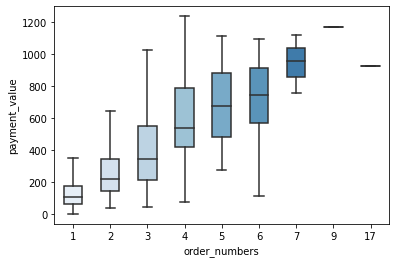

In [22]:
#box plot
sns.boxplot(x=cust_order_num['order_numbers'], y=cust_order_num['payment_value'],width=0.5,\
                 showfliers=False,
                palette="Blues")

<AxesSubplot:xlabel='order_numbers', ylabel='avg_payment'>

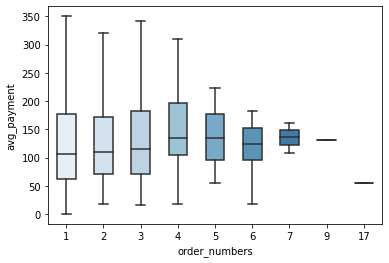

In [23]:
#box plot with average payment
# wrong --- cust_order_num['avg_payment']=cust_order_num['payment_value'].mean()
cust_order_num['avg_payment'] = \
    cust_order_num['payment_value']/cust_order_num['order_numbers']
#To remove the outliers from the chart, specify the “showfliers” parameter and set it to false.
sns.boxplot(x=cust_order_num['order_numbers'], y=cust_order_num['avg_payment'],\
            width=0.5,showfliers=False, palette="Blues")

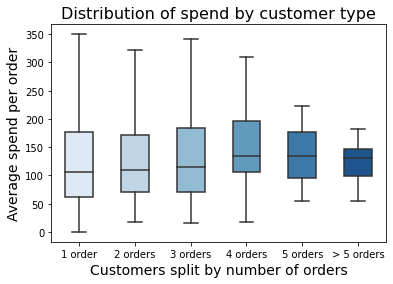

In [24]:
#group the order num > 5
cust_order_num['order_cat']=''
cust_order_num.loc[cust_order_num['order_numbers'] == 1, 'order_cat'] = '1 order'
cust_order_num.loc[cust_order_num['order_numbers'] == 2, 'order_cat'] = '2 orders'
cust_order_num.loc[cust_order_num['order_numbers'] == 3, 'order_cat'] = '3 orders'
cust_order_num.loc[cust_order_num['order_numbers'] == 4, 'order_cat'] = '4 orders'
cust_order_num.loc[cust_order_num['order_numbers'] == 5, 'order_cat'] = '5 orders'
cust_order_num.loc[cust_order_num['order_numbers'] > 5, 'order_cat'] = '> 5 orders'

bplot=sns.boxplot(x=cust_order_num['order_cat'], y=cust_order_num['avg_payment'],\
                width=0.5,showfliers=False, palette="Blues", \
                order=['1 order', '2 orders', '3 orders', '4 orders', '5 orders', '> 5 orders'])
# setting chart title, axis names, and changing styling
bplot.axes.set_title("Distribution of spend by customer type",fontsize=16)
bplot.set_xlabel("Customers split by number of orders", fontsize=14)
bplot.set_ylabel("Average spend per order",fontsize=14)
bplot.tick_params(labelsize=10)
sns.set_style("ticks")

In [25]:
product_all=product_df.merge(cat_translated, how='left', on='product_category_name')
product_order_item=order_item.merge(product_all, how='left', on='product_id')
product_order_item['total_price']=product_order_item['price']+product_order_item['freight_value']
product_order_item_sub =product_order_item[['order_id', 'product_id', 'total_price', 'product_category_name_english']] 
product_order_item_sub.head()

,order_id,product_id,total_price,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,72.19,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,259.83,pet_shop
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,216.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,25.78,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,218.04,garden_tools


In [26]:
cust_order_df=order_df.merge(customer_df, how='left', on='customer_id')
cust_order_df=cust_order_df[['order_id', 'customer_id', 'customer_unique_id']]
cust_order_num_df=cust_order_num.merge(cust_order_df, how='left', on='customer_unique_id' )
cust_order_num_item=cust_order_num_df.merge(product_order_item_sub, how='left', on='order_id')
cust_order_num_item.head()

,customer_unique_id,first_payment_month,order_numbers,payment_value,avg_payment,order_cat,order_id,customer_id,product_id,total_price,product_category_name_english
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,141.90,141.90,1 order,e22acc9c116caa3f2b7121bbb380d08e,fadbb3709178fc513abc1b2670aa1ad2,372645c7439f9661fbbacfd129aa92ec,141.90,bed_bath_table
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,27.19,27.19,1 order,3594e05a005ac4d06a72673270ef9ec9,4cb282e167ae9234755102258dd52ee8,5099f7000472b634fea8304448d20825,27.19,health_beauty
2,0000f46a3911fa3c0805444483337064,2017-03,1,86.22,86.22,1 order,b33ec3b699337181488304f362a6b734,9b3932a6253894a02c1df9d19004239f,64b488de448a5324c4134ea39c28a34b,86.22,stationery
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,43.62,43.62,1 order,41272756ecddd9a9ed0180413cc22fb6,914991f0c02ef0843c0e7010c819d642,2345a354a6f2033609bbf62bf5be9ef6,43.62,telephony
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,196.89,196.89,1 order,d957021f1127559cd947b62533f484f7,47227568b10f5f58a524a75507e6992c,c72e18b3fe2739b8d24ebf3102450f37,196.89,telephony


In [27]:
# the number of products in each number of orders
total = order_item.groupby('order_id').agg(product_cnt=('product_id', 'count')).reset_index()
total.sort_values('product_cnt', ascending=True)

payment_item = cust_order_num_item.merge(total, how='left', on='order_id')
order_item_table=payment_item.groupby('product_cnt').agg({'order_id':pd.Series.nunique, 'total_price':'mean',\
                                                 'avg_payment':'mean'}).reset_index()
print(order_item_table.head())
# total_payment=payment_df.merge(total, how='left', on='order_id')
# total_payment.sort_values('order_id')
# total_payment

   product_cnt  order_id  total_price  avg_payment
0          1.0     88597   150.667142   151.013675
1          2.0      7491   106.126424   210.430633
2          3.0      1317    97.676138   288.010332
3          4.0       502    97.863586   384.624772
4          5.0       203    94.979468   474.497340


# top selling categories

In [28]:
cust_order_num_item_sub=cust_order_num_item.groupby(['order_cat','product_category_name_english'])\
                                            .agg({'order_id':pd.Series.nunique, 'total_price':'mean',\
                                                 'avg_payment':'mean'}).reset_index()
cust_order_num_item_sub.columns = ['order_cat', 'product_category_name_english', 'order_id',\
                                   'total_price', 'avg_payment']
cust_order_num_item_sub.head()

,order_cat,product_category_name_english,order_id,total_price,avg_payment
0,1 order,agro_industry_and_commerce,176,378.852217,574.333695
1,1 order,air_conditioning,226,210.546250,311.010530
2,1 order,art,194,137.086517,150.353532
3,1 order,arts_and_craftmanship,18,92.422105,99.897368
4,1 order,audio,331,156.876163,167.828227


In [29]:
# creating two pivots to see top cateogries by volume and by dollar amount
top_selling_volume = cust_order_num_item.groupby(['product_category_name_english',\
    'order_cat'])['order_id'].count().reset_index()
top_selling_dollar = cust_order_num_item.groupby(['product_category_name_english', \
    'order_cat'])['total_price'].sum().reset_index()

In [30]:
top_selling_dollar_pivot = pd.pivot_table(top_selling_dollar, \
                                          index= 'product_category_name_english', columns='order_cat', \
                                          values="total_price")
top_selling_dollar_pivot

order_cat,1 order,2 orders,3 orders,4 orders,5 orders,> 5 orders
product_category_name_english,,,,,,
agro_industry_and_commerce,76907.00,1467.07,NaN,NaN,NaN,NaN
air_conditioning,55584.21,3926.03,257.92,NaN,101.12,NaN
art,27554.39,616.63,76.79,NaN,NaN,NaN
arts_and_craftmanship,1756.02,282.56,NaN,NaN,145.56,NaN
audio,53965.40,2081.58,31.75,NaN,137.18,NaN
...,...,...,...,...,...,...
stationery,266693.96,10319.71,533.18,142.71,NaN,52.15
tablets_printing_image,8462.52,170.65,60.72,NaN,NaN,60.72
telephony,376374.57,12405.15,659.37,4735.19,NaN,NaN


In [31]:
top_selling_volume_pivot = pd.pivot_table(top_selling_volume, \
                                          index= 'product_category_name_english', columns='order_cat', \
                                          values="order_id")
top_selling_volume_pivot

order_cat,1 order,2 orders,3 orders,4 orders,5 orders,> 5 orders
product_category_name_english,,,,,,
agro_industry_and_commerce,203.0,9.0,NaN,NaN,NaN,NaN
air_conditioning,264.0,21.0,1.0,NaN,1.0,NaN
art,201.0,7.0,1.0,NaN,NaN,NaN
arts_and_craftmanship,19.0,4.0,NaN,NaN,1.0,NaN
audio,344.0,16.0,1.0,NaN,1.0,NaN
...,...,...,...,...,...,...
stationery,2403.0,103.0,6.0,4.0,NaN,1.0
tablets_printing_image,79.0,2.0,1.0,NaN,NaN,1.0
telephony,4304.0,188.0,16.0,26.0,NaN,NaN


# Customer satisfaction overall + per product cateogry


In [32]:
review_cust_item=order_review.merge(cust_order_num_item, how='left', on='order_id')
review_product_score=review_cust_item.groupby('product_category_name_english')\
.agg({'review_score':['mean', 'median', 'count', np.std], 'order_id': pd.Series.nunique}).reset_index()
review_product_score.head()

product_category_name_english review_score                        order_id
                                        mean median count       std  nunique
0    agro_industry_and_commerce     4.000000    5.0   212  1.363019      182
1              air_conditioning     3.975177    5.0   282  1.437706      244
2                           art     3.937198    5.0   207  1.455127      200
3         arts_and_craftmanship     4.125000    5.0    24  1.392917       23
4                         audio     3.818942    5.0   359  1.520099      345

In [33]:
# creating a pviot to see review scores for customer's first purchase
review_cust_item.groupby(['first_payment_month'])\
                .agg({'review_score':'mean', 'total_price':'mean','avg_payment':'mean',\
                      'order_id':pd.Series.nunique})

,review_score,total_price,avg_payment,order_id
first_payment_month,,,,
2017-01,4.038652,140.890653,190.188095,828
2017-02,3.998544,145.558213,173.543121,1821
2017-03,4.039924,142.354904,176.160577,2766
2017-04,4.006501,153.766959,189.453009,2456
2017-05,4.120567,139.367692,173.049683,3809
2017-06,4.117173,140.403950,169.942717,3297
2017-07,4.112776,128.134943,160.212333,4073
2017-08,4.203484,135.353865,167.810554,4384
2017-09,4.119935,147.686879,208.727441,4323


In [34]:
# getting the mean score
review_cust_item['review_score'].mean()

4.017519810386302

# Guideline from the example

In [35]:
order_customer_info = order_df.merge(customer_df, how='left', on="customer_id")
print(len(order_customer_info))
#the guideline merge order_review, which will get duplicate order_id payment :(
order_customer_review_info = order_customer_info.merge(order_review, how='left', on="order_id")
print(len(order_customer_review_info))
all_order_info_1 = order_customer_review_info.merge(payment_df, how='left', on="order_id")
print(len(all_order_info_1))

all_order_info_1.head(3)

99441
99992
104478


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2.0,voucher,1.0,18.59


In [36]:
# (rather than having all the trailing hours + minutes)
all_order_info_1['order_purchase_timestamp_day'] = pd.to_datetime(all_order_info_1['order_purchase_timestamp'],\
                                                                format='%Y-%m-%d %H:%M:%S')
all_order_info_1['order_purchase_timestamp_month'] = all_order_info_1['order_purchase_timestamp_day'].dt.strftime('%b %Y')

# strip dataframe to contain just order month and payment value (e.g. only fields we want to aggregate)
revenue = all_order_info_1[['order_purchase_timestamp_month', 'payment_value', 'order_id']]

# now we're going to aggregate payment_value and order_id by the month to get the montly revenue and 
# monthly number of orders
revenue =  revenue.groupby('order_purchase_timestamp_month').\
    agg({'payment_value':'sum', 'order_id': pd.Series.nunique}).reset_index()

revenue.head(3)

,order_purchase_timestamp_month,payment_value,order_id
0,Apr 2017,418753.06,2404
1,Apr 2018,1163314.66,6939
2,Aug 2017,680105.55,4331
